In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/incomeexpenditure-dataset/Inc_Exp_Data.csv


**Load Dataset**

In [2]:
income=pd.read_csv("/kaggle/input/incomeexpenditure-dataset/Inc_Exp_Data.csv")

In [3]:
income.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


**Analyze the data**

In [4]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [5]:
income.shape

(50, 7)

In [6]:
income.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


In [7]:
income.describe().T

,count,mean,std,min,25%,50%,75%,max
Mthly_HH_Income,50.0,41558.00,26097.908979,5000.0,23550.0,35000.0,50375.0,100000.0
Mthly_HH_Expense,50.0,18818.00,12090.216824,2000.0,10000.0,15500.0,25000.0,50000.0
No_of_Fly_Members,50.0,4.06,1.517382,1.0,3.0,4.0,5.0,7.0
Emi_or_Rent_Amt,50.0,3060.00,6241.434948,0.0,0.0,0.0,3500.0,35000.0
Annual_HH_Income,50.0,490019.04,320135.792123,64200.0,258750.0,447420.0,594720.0,1404000.0
No_of_Earning_Members,50.0,1.46,0.734291,1.0,1.0,1.0,2.0,4.0


In [8]:
income.isnull().sum()

Mthly_HH_Income             0
Mthly_HH_Expense            0
No_of_Fly_Members           0
Emi_or_Rent_Amt             0
Annual_HH_Income            0
Highest_Qualified_Member    0
No_of_Earning_Members       0
dtype: int64

In [9]:
income.isna().any()

Mthly_HH_Income             False
Mthly_HH_Expense            False
No_of_Fly_Members           False
Emi_or_Rent_Amt             False
Annual_HH_Income            False
Highest_Qualified_Member    False
No_of_Earning_Members       False
dtype: bool

**No null values in the dataset**

# Mean Expense of a Household

In [10]:
income["Mthly_HH_Expense"].mean()

18818.0

# Median Household Expense

In [11]:
income["Mthly_HH_Expense"].median()

15500.0

# Monthly Expense for most of the Households

In [12]:
mth_exp_tmp = pd.crosstab(index=income["Mthly_HH_Expense"], columns="count")

In [13]:
mth_exp_tmp.reset_index(inplace=True)

In [14]:
mth_exp_tmp[mth_exp_tmp['count'] == income.Mthly_HH_Expense.value_counts().max()]

col_0,Mthly_HH_Expense,count
18,25000,8


# Plot the Histogram to count the Highest qualified member

<AxesSubplot:>

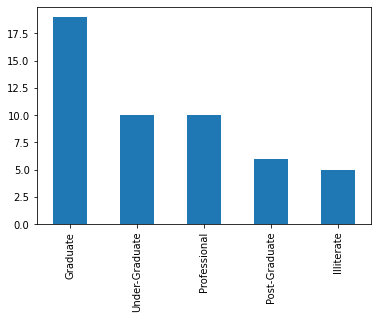

In [15]:
income["Highest_Qualified_Member"].value_counts().plot(kind="bar")

Insight: Highest Qualified Member is Graduate

# Calculate IQR(difference between 75% and 25% quartile)

<AxesSubplot:xlabel='Mthly_HH_Income'>

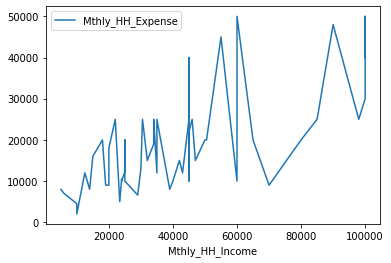

In [16]:
income.plot(x="Mthly_HH_Income", y="Mthly_HH_Expense")

In [17]:
IQR=income["Mthly_HH_Expense"].quantile(0.75)-income["Mthly_HH_Expense"].quantile(0.25)

In [18]:
IQR

15000.0

# Calculate Standard Deviation for first 4 columns

In [19]:
pd.DataFrame(income.iloc[:,0:5].std().to_frame())

,0
Mthly_HH_Income,26097.908979
Mthly_HH_Expense,12090.216824
No_of_Fly_Members,1.517382
Emi_or_Rent_Amt,6241.434948
Annual_HH_Income,320135.792123


In [20]:
pd.DataFrame(income.iloc[:,0:5].std().to_frame()).T

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income
0,26097.908979,12090.216824,1.517382,6241.434948,320135.792123


# Calculate Variance for first 3 columns

In [21]:
pd.DataFrame(income.iloc[:,0:4].var().to_frame()).T

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt
0,6.811009e+08,1.461733e+08,2.302449,3.895551e+07


# Calculate the count of Highest qualified member

In [22]:
income["Highest_Qualified_Member"].value_counts().to_frame().T

,Graduate,Under-Graduate,Professional,Post-Graduate,Illiterate
Highest_Qualified_Member,19,10,10,6,5


# Plot the Histogram to count the No_of_Earning_Members

<AxesSubplot:>

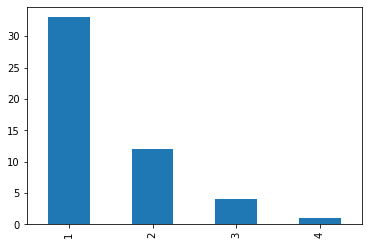

In [23]:
income["No_of_Earning_Members"].value_counts().plot(kind="bar")

# Suppose you have option to invest in Stock A or Stock B. The stocks • have different expected returns and standard deviations. The expected return of Stock A is 15% and Stock B is 10%. Standard Deviation of the returns of these stocks is 10% and 5% respectively.Which is better investment?

In [24]:
#Here we need to calculate the coeff of variation 

Coeff_of_var_StockA=10/15
print(Coeff_of_var_StockA)


0.6666666666666666


In [25]:
Coeff_of_var_StockB=5/10
print(Coeff_of_var_StockB)

0.5
